In [1]:
!pip install plotly --upgrade

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd



In [57]:
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.io as pio
import plotly.express as px

In [58]:
pio.renderers.default = 'notebook'


In [5]:
df = pd.read_csv("baseline_prediction.csv", sep=",")


df = df.drop(df.columns[0], axis=1)


In [5]:
df.head()

,ds,yhat_lower,yhat,yhat_upper,y_true,error
0,2022-08-01,384.639184,713.338267,1076.660281,451.3,262.038267
1,2022-08-02,355.889054,712.861707,1040.215585,742.6,29.738293
2,2022-08-03,366.069886,715.181665,1061.411265,1031.1,315.918335
3,2022-08-04,382.889734,725.512169,1079.763670,967.3,241.787831
4,2022-08-05,584.897535,934.273843,1303.746805,772.5,161.773843


/var/folders/ry/8k8zjwzn74xc2mjn3ml3yh940000gn/T/ipykernel_81780/3880749033.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


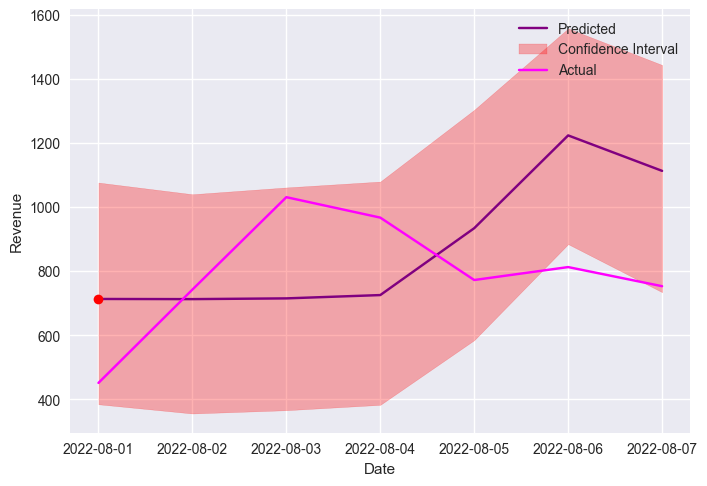

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Set the figure size and style
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

# Set up the axis and plot the predicted revenue values
fig, ax = plt.subplots()
ax.plot(df['ds'], df['yhat'], color='purple', label='Predicted')

# Fill in the shaded regions for the confidence intervals
ci = ax.fill_between(df['ds'], df['yhat_lower'], df['yhat_upper'], color='red', alpha=0.3, label='Confidence Interval')

# Plot the actual revenue values
ax.plot(df['ds'], df['y_true'], color='magenta', label='Actual')

# Set the axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.legend()

# Set up the animated red dot
dot, = ax.plot([df['ds'][0]], [df['yhat'][0]], 'o', color='red')

# Define the animation function
def animate(i):
    # Set the x and y coordinates of the red dot
    
    x = df['ds'][i]
    y = df['yhat'][i]
    
        # Set the position of the dot
    dot.set_data([x], [y]) 
    
    # Return the dot and confidence interval objects
    return dot, ci

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(df['ds']), interval=2000, blit=True, repeat = True)

ani.event_source.start()


# Show the plot
plt.show()






In [20]:


# Create a subplot with the prediction line and confidence intervals
fig = sp.make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', line=dict(color='blue'), name='Predicted'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', line=dict(color='green'), name='Actual'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_upper'], fill='tonexty', line=dict(color='gray'), name='Confidence Interval'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_lower'], fill='tonexty', line=dict(color='gray'), showlegend=False))

# Add a red dot trace for the animated dot
red_dot = go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(color='red', size=10), name='Animated Dot')
fig.add_trace(red_dot)

# Set up the animation frames
frames = []
for i in range(1, len(df)):
    frame = go.Frame(data=[go.Scatter(x=[df['ds'][i]], y=[df['yhat'][i]], mode='markers', marker=dict(color='red', size=10), name='Animated Dot')])
    frames.append(frame)

# Define the animation
animation = dict(frames=frames, repeat=True)

# Update the layout with the animation
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, animation])])],
                  xaxis=dict(range=[df['ds'].min(), df['ds'].max()]),
                  yaxis=dict(range=[df[['y_true', 'yhat_lower', 'yhat', 'yhat_upper']].min().min(), df[['y_true', 'yhat_lower', 'yhat', 'yhat_upper']].max().max()]),
                  title='Revenue Prediction')

# Add the slider to the layout
fig['layout']['sliders'] = [dict(
    steps=[dict(method='animate', args=[[f.name], animation], label=str(f)) for f in fig.frames],
    active=0,
    transition=dict(duration=300),
    x=0, y=0, len=1)]




# Show the plot
fig.show()


In [21]:
import plotly.express as px



# Set up the plot
fig = px.line(df, x="ds", y="yhat")

# Add the red dot
fig.add_trace(px.scatter(df.iloc[[0]], x="ds", y="yhat", size=[10], color=[1]))

# Define the animation function
def animate(frame):
    # Update the position of the red dot
    fig.data[1].x = [df.iloc[frame]['ds']]
    fig.data[1].y = [df.iloc[frame]['yhat']]
    fig.data[1].customdata = [frame]

    return fig

# Create the animation
animation = fig.animate(frames=len(df), interval=500)

# Show the plot
animation.show()


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': ('ds=%{x}<br>yhat=%{y}<br>size=%' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([1]),
                         'coloraxis': 'coloraxis',
                         'size': array([10]),
                         'sizemode': 'area',
                         'sizeref': 0.025,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['2022-08-01'], dtype=object),
              'xaxis': 'x',
              'y': array([713.33826695]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'ds'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'yhat'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [12]:
import plotly.express as px
import pandas as pd

data = pd.read_csv("baseline_prediction.csv", sep=",")


# Define the data
#data = {'ds': ['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07'],
        #'yhat': [713.34, 712.86, 715.18, 725.51, 934.27, 1223.93, 1113.24],
        #'y_true': [451.3, 742.6, 1031.1, 967.3, 772.5, 812.9, 753.2]}
df = pd.DataFrame(data)

# Create the animated line chart
fig = px.line(df, x='ds', y='yhat', labels={'yhat': 'Predicted Revenue'}, title='Revenue Forecast')
fig.add_trace(px.scatter(df, x=[df['ds'][0]], y=[df['yhat'][0]], size=[20], color=[df['yhat'][0]], color_continuous_scale='reds').data[0])

fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x')

fig.show()



In [14]:
import plotly.express as px

# Import data
df = pd.read_csv("baseline_prediction.csv", sep=",")


# Create the figure
fig = px.line(df, x='ds', y='yhat', title='Revenue Forecast')

# Add confidence interval
fig.add_band(x=df['ds'], y0=df['yhat_lower'], y1=df['yhat_upper'], name='Confidence Interval')

# Create the red dot trace
dot_trace = px.scatter(df, x='ds', y='yhat', size=[10]*len(df), color_discrete_sequence=['red'])

# Add the dot trace to the figure
fig.add_trace(dot_trace.data[0])

# Add play button to the figure
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True, transition=dict(duration=0, easing='linear'))]
        )]
    )]
)

# Create the animation frames
frames = []
for i in range(len(df)):
    frame = px.scatter(df.iloc[i:i+1], x='ds', y='yhat', size=[10]*len(df.iloc[i:i+1]), color_discrete_sequence=['red'])
    frames.append(frame.data[0])

# Add the frames to the figure
fig.frames = frames

# Set the animation duration
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100

# Show the plot
fig.show()


AttributeError: 'Figure' object has no attribute 'add_band'

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Creating the data frame
data = {
    'ds': ['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07'],
    'yhat_lower': [384.63918416240546, 355.8890544243073, 366.0698856303859, 382.8897339080567, 584.897534765843, 884.5776736949156, 734.5509652533124],
    'yhat': [713.3382669475548, 712.8617065700059, 715.1816645934065, 725.5121689191826, 934.2738429988937, 1223.9334331974158, 1113.2383001971923],
    'yhat_upper': [1076.6602809897156, 1040.215584818263, 1061.4112648692685, 1079.7636700269463, 1303.7468054340275, 1557.7601105627793, 1443.8278068272743],
    'y_true': [451.3, 742.6, 1031.1, 967.3, 772.5, 812.9, 753.2]
}
df = pd.DataFrame(data)

# Plotting the data
fig = go.Figure()

# Adding the predicted values
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], name='Predicted'))

# Adding the confidence interval
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_upper'], name='Upper Bound', showlegend=False, fill=None, mode='lines'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_lower'], name='Lower Bound', showlegend=False, fill='tonexty', mode='lines'))

# Adding the actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], name='Actual'))

# Adding the animated red dot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], name='Animated Dot', mode='markers', marker=dict(color='red', size=10)))

# Updating the layout
fig.update_layout(title='Revenue Forecast', xaxis_title='Date', yaxis_title='Revenue', hovermode='x')

# Adding the play button
fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}]
        )]
    )]
)

# Creating the frames for the animation
frames = [go.Frame(data=[go.Scatter(x=[df['ds'][i]], y=[df['yhat'][i]])]) for i in range(1, len(df))]

# Updating the animation settings
fig.update(frames=frames)

# Displaying the figure
fig.show()


In [55]:
import plotly.express as px
import pandas as pd

# Create a dataframe with the data
df = pd.read_csv("baseline_prediction.csv", sep=",")
# Set up the plot
fig = px.line(df, x='ds', y='yhat', title='Predicted Revenue, Actual Revenue and Confidence Interval')
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')


# Add the confidence interval band
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_upper'], fill=None, mode='lines', line_color='yellow'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat_lower'], fill='tonexty', mode='lines', line_color='yellow', name='Confidence Interval'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', line_color='purple', name='Actual'))

fig.add_trace(
    go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', line=dict(color='magenta'), name = 'Predicted'))


# Add the red dot and animation frame
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction Tracker'))
frames = [go.Frame(data=[go.Scatter(x=[df['ds'][i]], y=[df['yhat'][i]], mode='markers', marker=dict(size=10, color='red'))]) for i in range(1, len(df['ds']))]

# Set up the animation
buttons = [dict(label="Play", method="animate", args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])]
fig.update_layout(updatemenus=[dict(type="buttons", buttons=buttons, showactive=False)])
fig.update(frames=frames)



#Set the y-axis range from 0 to the maximum value of the 'yhat_upper' column
fig.update_layout(yaxis_range=[0, df['yhat_upper'].max()])


# Show

fig.show()


In [60]:
import plotly.express as px
import pandas as pd

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the red dot as a scatter plot
fig.add_trace(px.scatter(df, x='ds', y='yhat', color='error').data[0])

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 200, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1])]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()



In [77]:

import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 200, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()


In [88]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', line_color='rgb(0, 255, 0)', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', line_color='rgb(255, 0, 0)', name='Actual'))

# Add the red dot as a scatter plot
scatter = fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(color='rgb(255, 0, 0)', size=10)))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 500, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Add the heatmap
heatmap = px.density_heatmap(df, x='ds', y='y_true', nbinsx=50, nbinsy=50, color_continuous_scale='Blues', range_color=[0, df['y_true'].max()])
heatmap.update_traces(showlegend=True, name='Revenue Density', hovertemplate='Revenue Density: %{z:.2f}<br> Date: %{x}<br> Revenue: %{y}')
heatmap.update_layout(legend=dict(x=0.85, y=1.15))

# Add the heatmap to the figure
fig.add_trace(heatmap.data[0])

# Create the frames for the animation
frames = [go.Frame(data=[go.Scatter(x=df['ds'][:i+1], y=df['yhat'][:i+1]),
                         go.Scatter(x=[df['ds'][i]], y=[df['yhat'][i]], mode='markers', marker=dict(color='rgb(255, 0, 0)', size=10))
                        ]) for i in range(len(df))]









# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()


In [87]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 200, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')


# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='gray'),
        hoverinfo = 'skip',
        showlegend=True,
        name = 'Confidence Interval',
        visible = True
    )
)


# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=14, color='red'), name='Prediction Tracker'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range and labels
fig.update_layout(xaxis=dict(title='Date'), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))


# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1200},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=14, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames


# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo = 'skip',
        showlegend=True,
        name = 'Confidence Interval'
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=14, color='red'), name='Prediction Tracker'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range and labels
fig.update_layout(xaxis=dict(title='Date'), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1200},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=14, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Add the heatmap
#fig.add_trace(go.Heatmap(x=df['ds'], y=[1], z=[df['y_true']], showscale=False, colorscale='RdYlGn', name='Revenue'))

# Show the plot
fig.show()

In [11]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo = 'skip',
        showlegend=True,
        name = 'Confidence Interval'
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=14, color='red'), name='Prediction Tracker'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range and labels
fig.update_layout(xaxis=dict(title='Date'), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1200},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=14, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()

In [115]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=True
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Set the axis range and labels
fig.update_layout(xaxis=dict(title='Date'), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1200},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red')
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()


In [92]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Revenue')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)


# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False,
        mode='lines',
        line_color='gray'
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1000, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red'),
                          text=[f"{df['yhat'][i]:.2f}"],
                          textposition='bottom center'
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Add the heatmap
fig.add_trace(go.Heatmap(x=df['ds'], y=[0], z=[df['y_true']], colorscale='YlGnBu', showscale=False, name='Revenue'))

# Show the plot
fig.show()


In [99]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(title='Date', range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1000, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red')
                         )
                     ]) for i in range(len(df))]




# Add the frames to the animation
fig.frames = frames

# Create the heatmap
heatmap = px.density_heatmap(df, x='ds', y='yhat', nbinsx=50, nbinsy=50, template='plotly_dark')




# Add the heatmap to the figure
#fig.add_trace(heatmap.data[0])

# Show the plot
fig.show()


In [139]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=True,
        name='Confidence Interval',
        visible=True  # set visible to True for all frames
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction', visible=True))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range and labels
fig.update_layout(xaxis=dict(title='Date'), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1200},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red'),
                          visible=i==0  # set visible to False for all frames except the first frame
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Show the plot
fig.show()


In [138]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create the plot
fig = px.line(df, x='ds', y='yhat', template='plotly_dark')

# Add the confidence interval
fig.add_trace(
    go.Scatter(
        x=df['ds'].tolist() + df['ds'].tolist()[::-1],
        y=df['yhat_upper'].tolist() + df['yhat_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='gray',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo='skip',
        showlegend=False
    )
)

# Add the predicted revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['yhat'], mode='lines', name='Predicted'))

# Add the actual revenue line
fig.add_trace(go.Scatter(x=df['ds'], y=df['y_true'], mode='lines', name='Actual'))

# Add the red dot as a scatter plot
fig.add_trace(go.Scatter(x=[df['ds'][0]], y=[df['yhat'][0]], mode='markers', marker=dict(size=10, color='red'), name='Prediction'))

# Add the annotations with the predicted revenue values
annotations = []
for i in range(len(df)):
    annotations.append(dict(x=df['ds'][i], y=df['yhat'][i], text=f"{df['yhat'][i]:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-20))
fig.update_layout(annotations=annotations)

# Set the axis range
fig.update_layout(xaxis=dict(title='Date', range=[df['ds'].min(), df['ds'].max()]), yaxis=dict(title='Revenue', range=[0, df['yhat_upper'].max()]))

# Add the play button
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, {"frame": {"duration": 1000, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]
                         )
                   ]
        )
    ]
)

# Create the frames for the animation
frames = [dict(data=[dict(type='scatter',
                          x=df['ds'][:i+1],
                          y=df['yhat'][:i+1],
                          mode='lines'
                         ),
                      dict(type='scatter',
                          x=[df['ds'][i]],
                          y=[df['yhat'][i]],
                          mode='markers',
                          marker=dict(size=10, color='red'),
                          name='Prediction tracer',
                          text=[f"{df['yhat'][i]:.2f}"],
                          textposition='bottom center'
                         )
                     ]) for i in range(len(df))]

# Add the frames to the animation
fig.frames = frames

# Create the heatmap
heatmap = px.density_heatmap(df, x='ds', y='yhat', nbinsx=50, nbinsy=50, template='plotly_dark')

# Add the heatmap to the figure
fig.add_trace(heatmap.data[0])

# Show the plot
fig.show()


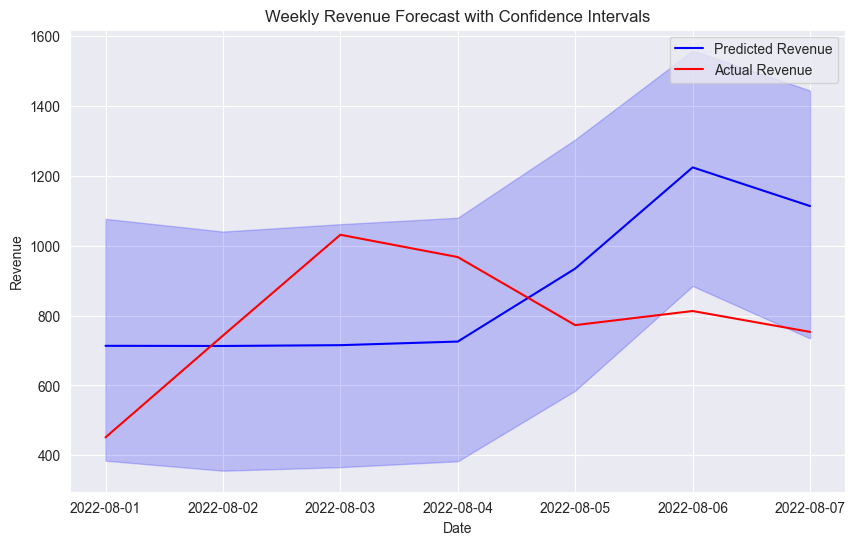

In [10]:


# Plot the data using Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x="ds", y="yhat", ax=ax, color="blue", label="Predicted Revenue")
sns.lineplot(data=df, x="ds", y="y_true", ax=ax, color="red", label="Actual Revenue")
ax.fill_between(df["ds"], df["yhat_lower"], df["yhat_upper"], alpha=0.2, color="blue")
ax.legend()
ax.set_title("Weekly Revenue Forecast with Confidence Intervals")
ax.set_xlabel("Date")
ax.set_ylabel("Revenue")
plt.show()


NameError: name 'df' is not defined

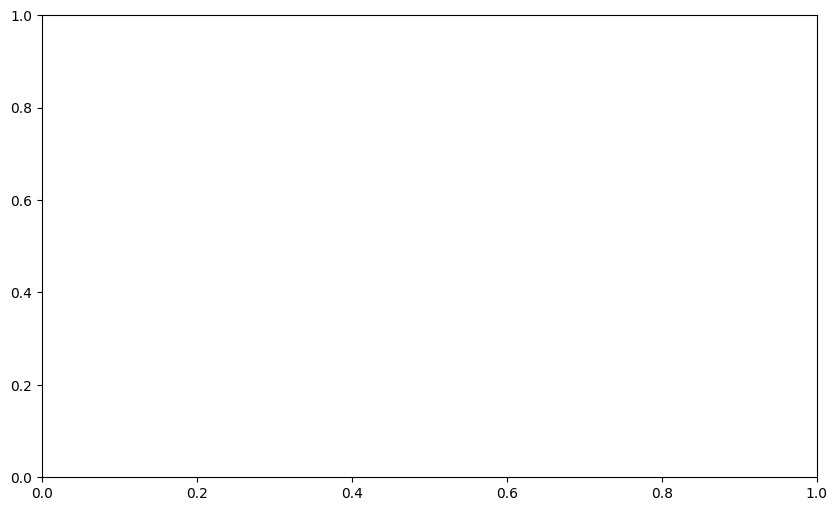

In [3]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the predicted revenue values
ax.plot(df['ds'], df['yhat'], color='blue', label='Predicted')

# Fill in the shaded regions for the confidence intervals
ax.fill_between(df['ds'], df['yhat_lower'], df['yhat_upper'], color='gray', alpha=0.3, label='Confidence Interval')

# Plot the actual revenue values
ax.plot(df['ds'], df['y_true'], color='green', label='Actual')

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

# Show the plot
plt.show()


--2023-03-10 03:59:47--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40906 (40K) [text/plain]
Saving to: ‘//Users/alexandrebraxton/code/philippniegisch/fortunefrontier/rose-pine.mplstyle.7’

rose-pine.mplstyle. 100%[===================>]  39.95K  --.-KB/s    in 0.02s   

2023-03-10 03:59:47 (2.13 MB/s) - ‘//Users/alexandrebraxton/code/philippniegisch/fortunefrontier/rose-pine.mplstyle.7’ saved [40906/40906]

--2023-03-10 03:59:47--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.

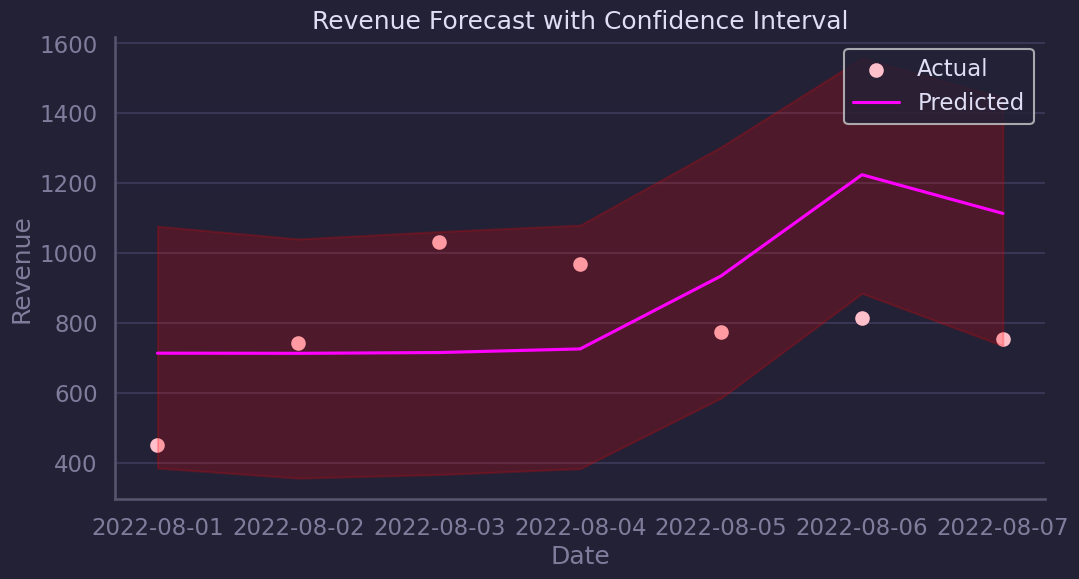

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P //Users/alexandrebraxton/code/philippniegisch/fortunefrontier
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P //Users/alexandrebraxton/code/philippniegisch/fortunefrontier
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P //Users/alexandrebraxton/code/philippniegisch/fortunefrontier

#set up seaborn 
sns.set_style("white")
sns.set_context("talk")

# use the rose-pine-moon style
with plt.style.context("/Users/alexandrebraxton/code/philippniegisch/fortunefrontier/rose-pine-moon.mplstyle"):
    # Create figure and axes objects
    fig, ax = plt.subplots(figsize=(12, 6))

    # plot actual revenue values as scatter points
    ax.scatter(df["ds"], df["y_true"], color="pink", label="Actual")

    # plot predicted revenue values as line with confidence interval
    ax.plot(df["ds"], df["yhat"], color="magenta", label="Predicted")
    ax.fill_between(df["ds"], df["yhat_lower"], df["yhat_upper"], alpha=0.2, color="red")

    # set axis labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Revenue")
    ax.set_title("Revenue Forecast with Confidence Interval")

    # add legend
    ax.legend()

    plt.show()

    



In [16]:
import os

print(os.getcwd())


/Users/alexandrebraxton/code/philippniegisch/fortunefrontier


# F&B Revenue Forecast Model

## Data

In [2]:
#Loading the raw data

df_2016 = pd.read_csv("raw_data/orders2016.csv", sep=";")
df_2017 = pd.read_csv("raw_data/orders2017.csv", sep=";")
df_2018 = pd.read_csv("raw_data/orders2018.csv", sep=";")
df_2019 = pd.read_csv("raw_data/orders2019.csv", sep=";")
df_2020 = pd.read_csv("raw_data/orders2020.csv", sep=";")
df_2021 = pd.read_csv("raw_data/orders2021.csv", sep=";")
df_2022 = pd.read_csv("raw_data/orders2022.csv", sep=";")

df_list = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

In [3]:
df_2018.head()

,id,date,time,quantity,item_id,item_name,item_plu,item_price,expense_item,cancelled,...,device_name,device_number,device_id,table_name,table_id,tab_name,tab_id,party_name,party_number,party_id
0,689E8A27-629F-43C4-B458-251F245F5A8E,2018-04-22,14:01:47,1,6742FD21-98EF-4543-AD03-D615DD32741F,Waffle + A WHITE CHOCO,0,740,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,000008A2-13BE-40B3-A1A6-9C054D4FF5B9,Partei 1,0,825E8016-9802-4A69-A25B-3F95C27D1280
1,05AB42CE-0ED7-423A-A241-C7D0D412B082,2018-04-21,15:21:28,1,A1A8AB5A-AE65-4EB6-B52E-71813E7C97DF,C Classic CHOCOLATE,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0002678D-1635-4CCC-B2EF-3536C931EA23,Partei 1,0,28D2D25E-E573-476B-8A0D-A15A5C6BBEFC
2,D889B52F-B5BC-4DBE-BA15-38DF81465708,2018-05-05,16:35:49,1,54710C6E-662B-45FE-8874-1EBD27BC5CBF,A Classic VANILLA,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
3,BDA43D01-74EA-48A4-BD5C-C4D6CDDB679C,2018-05-05,16:35:49,1,ED12F302-549B-436D-A19A-A60D74D46F5F,B Classic CHOCOLATE,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
4,3736E95B-CC65-4B9A-BC0C-ADFFA9D18950,2018-05-05,16:35:49,1,F2162A86-15D4-49CC-943E-9071CC7BC786,D Classic RASPBERRY,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB


In [4]:
#Dropping unnecessary columns, grouping by "date", summing "item_price" to get daily revenues

for i, df in enumerate(df_list):
    df_list[i] = pd.DataFrame(df.groupby(by="date")["item_price"].sum()/100)

In [5]:
#Concat all data in one dataframe, rename the columns for prophet

df = pd.concat(df_list, ignore_index=False)
df = df.rename(columns={"date": "ds", "item_price": "y"})
df["ds"] = df.index
df = df.reset_index(drop=True)
df = df[["ds","y"]]
df

,ds,y
0,2016-09-01,365.9
1,2016-09-02,358.6
2,2016-09-03,487.5
3,2016-09-04,90.9
4,2016-09-05,125.0
...,...,...
1729,2022-11-18,78.5
1730,2022-11-19,287.3
1731,2022-11-20,125.8
1732,2022-11-21,1.5


In [6]:
df['ds'] = pd.to_datetime(df['ds'])


In [7]:
df.describe()

,y
count,1734.000000
mean,671.720704
std,452.051893
min,1.500000
25%,329.575000
50%,573.100000
75%,927.025000
max,2832.900000


<Axes: xlabel='y', ylabel='Count'>

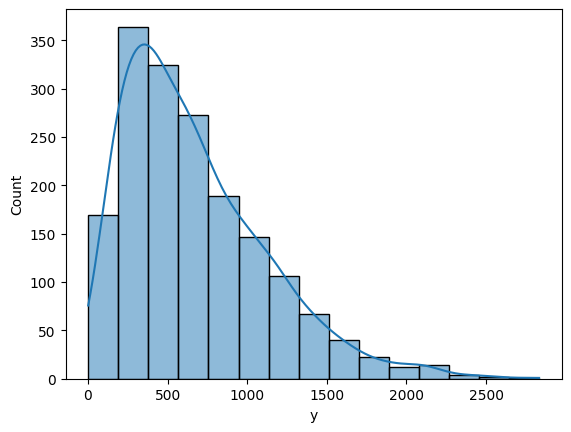

In [8]:
sns.histplot(data=df["y"],kde=True,bins=15)

<Axes: xlabel='ds', ylabel='y'>

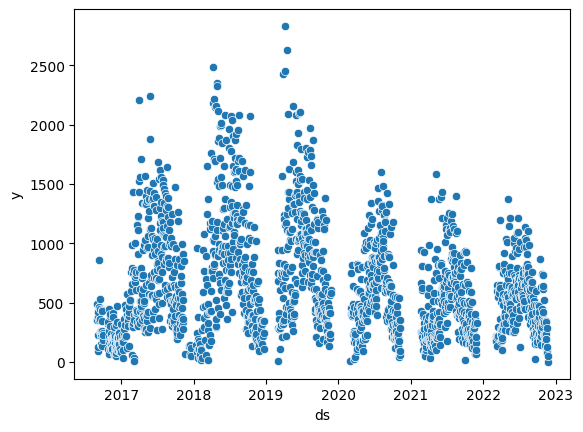

In [9]:
sns.scatterplot(x=df["ds"],y=df["y"])

In [14]:
df_consumption_climate = pd.read_csv("Consumption Climate Final.csv")


df_consumption_climate = df_consumption_climate.reset_index()

df_consumption_climate['Date'] = pd.to_datetime(df_consumption_climate['Date'])

df_consumption_climate = df_consumption_climate.set_index('Date')

df_consumption_climate = df_consumption_climate.resample('D').ffill().reset_index()

df_consumption_climate = df_consumption_climate.drop(columns=['index'])

df_consumption_climate = df_consumption_climate.rename(columns={'Date': 'ds'})

merged_consumption_df = pd.merge(df, df_consumption_climate,on="ds",how="left")






FileNotFoundError: [Errno 2] No such file or directory: 'Consumption Climate Final.csv'

In [16]:
merged_consumption_df.head()


,ds,y,Consumption Climate
0,2016-09-01,365.9,10.0
1,2016-09-02,358.6,10.0
2,2016-09-03,487.5,10.0
3,2016-09-04,90.9,10.0
4,2016-09-05,125.0,10.0


In [19]:
merged_consumption_df = merged_consumption_df.drop(columns=['y'])




KeyError: "['y'] not found in axis"

In [21]:
merged_consumption_df.head()

,ds,Consumption Climate
0,2016-09-01,10.0
1,2016-09-02,10.0
2,2016-09-03,10.0
3,2016-09-04,10.0
4,2016-09-05,10.0


In [22]:
merged_consumption_df.to_csv('consumption_climate_new.csv', index=False)



In [2]:
#Berlin Unemployment Mitte and Mitte Mitte
df_unemp_ber= pd.read_csv("berlin_unemployment.csv", sep=";")

df_unemp_ber['Date'] = pd.to_datetime(df_unemp_ber['Date'], format='%d/%m/%Y')

In [3]:
df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']] = df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']].apply(lambda x: x.str.replace(',', '.'))

In [4]:
df_unemp_ber = df_unemp_ber.astype({"unemp_Berlin_Mitte": float, "unemp_Berlin_Mitte_Mitte": float})

In [5]:
df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']] = df_unemp_ber[['unemp_Berlin_Mitte', 'unemp_Berlin_Mitte_Mitte']].div(100)

In [6]:
df_unemp_ber.to_csv("unemployment_newnew.csv", index = False)

In [7]:
df_unemp_ber.set_index('Date', inplace=True)

In [8]:
df_unemp_ber = df_unemp_ber.resample('D').ffill()

In [9]:
df_unemp_ber.to_csv("unemployment_new.csv", index = False)

In [ ]:
df_unemp_ber.to_csv("unemployment_newnew.csv", index = False)

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import datetime
from fbprophet import Prophet

# Load preprocessed data
df = pd.read_csv("merged_data.csv")

# Set prediction date (input by user)
prediction_date = pd.to_datetime("2023-03-16")

# Split data into training and testing sets based on prediction date
train_df = df[df["ds"] < prediction_date]
test_df = df[df["ds"] >= prediction_date]

X_train = train_df.drop(columns=["y"])
y_train = train_df["y"]
X_test = test_df.drop(columns=["y"])
y_test = test_df["y"]

# Set MLflow experiment and run ID
experiment_name = "Fortune Frontier"
mlflow.set_experiment(experiment_name)
client = MlflowClient()
experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
run_id = client.create_run(experiment_id).info.run_id

# Initialize the Prophet model
m = Prophet()

# Add relevant regressors
m.add_regressor('weather_main')
m.add_regressor('Holiday')
m.add_regressor('inflation_rate')
m.add_regressor('consumption_climate')
m.add_regressor('cov_lock')
m.add_regressor('unemp_Berlin_Mitte')
m.add_regressor('unemp_Berlin_Mitte_Mitte')
m.add_regressor('pedestrians')

# Fit the Prophet model to the data
m.fit(train_df)

# Make predictions on the test data
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(test_df['y'], forecast[-7:]['yhat'])

# Log the model and results to MLflow
with mlflow.start_run(run_id=run_id):
    # Log hyperparameters (if applicable)
    # ...
    # Log metrics
    mlflow.log_metric("mae", mae)
    # Log the model
    mlflow.pyfunc.log_model("model", python_model=m)


# Print run ID
print("MLflow run ID:", run_id)






In [ ]:
from prefect import task, Flow
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import datetime
from fbprophet import Prophet


@task
def load_data():
    # Load preprocessed data
    df = pd.read_csv("merged_data.csv")
    return df


@task
def split_data(df):
    # Set prediction date (input by user)
    prediction_date = pd.to_datetime("2023-03-16")

    # Split data into training and testing sets based on prediction date
    train_df = df[df["ds"] < prediction_date]
    test_df = df[df["ds"] >= prediction_date]

    X_train = train_df.drop(columns=["y"])
    y_train = train_df["y"]
    X_test = test_df.drop(columns=["y"])
    y_test = test_df["y"]
    
    return train_df, test_df


@task
def train_model(train_df):
    # Initialize the Prophet model
    m = Prophet()

    # Add relevant regressors
    m.add_regressor('weather_main')
    m.add_regressor('Holiday')
    m.add_regressor('inflation_rate')
    m.add_regressor('consumption_climate')
    m.add_regressor('cov_lock')
    m.add_regressor('unemp_Berlin_Mitte')
    m.add_regressor('unemp_Berlin_Mitte_Mitte')
    m.add_regressor('pedestrians')

    # Fit the Prophet model to the data
    m.fit(train_df)

    return m


@task
def test_model(model, test_df):
    # Make predictions on the test data
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(test_df['y'], forecast[-7:]['yhat'])

    return mae


@task
def log_results(mae, model):
    # Set MLflow experiment and run ID
    experiment_name = "Fortune Frontier"
    mlflow.set_experiment(experiment_name)
    client = MlflowClient()
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
    run_id = client.create_run(experiment_id).info.run_id
    
    # Log metrics
    mlflow.log_metric("mae", mae)
    
    # Log the model
    mlflow.pyfunc.log_model("model", python_model=model)
    
    # Print run ID
    print("MLflow run ID:", run_id)


with Flow("prophet-model") as flow:
    data = load_data()
    train, test = split_data(data)
    model = train_model(train)
    mae = test_model(model, test)
    log_results(mae, model)


flow.run()


In [ ]:
from prefect import task, Flow
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import datetime
from fbprophet import Prophet
from preprocess import preprocess_revenue



@task
#Load Data
df = preprocess_revenue()


@task
def split_data(df):
    # Set prediction date (input by user)
    #Prediction Date
    split_date = "2022-07-31"

    #Splitting the data
    split_date = "2022-07-31"
    index_split = df[df["ds"]==split_date].index[0]+1
    df_train = df.iloc[:index_split]
    df_test = df.iloc[index_split:]
    y_test = pd.DataFrame(df_test["y"])
    
    #Fitting the model
    m = Prophet()
    m = m.fit(df_train)
    

@task
def train_model(train_df):
    # Initialize the Prophet model
    m = Prophet()

    # Add relevant regressors
    m.add_regressor('weather_main')
    m.add_regressor('Holiday')
    m.add_regressor('inflation_rate')
    m.add_regressor('consumption_climate')
    m.add_regressor('cov_lock')
    m.add_regressor('unemp_Berlin_Mitte')
    m.add_regressor('unemp_Berlin_Mitte_Mitte')
    m.add_regressor('pedestrians')

    # Fit the Prophet model to the data
    m.fit(train_df)

    return m


@task
def test_model(model, test_df):
    # Make predictions on the test data
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(test_df['y'], forecast[-7:]['yhat'])

    return mae, forecast 



@task
def log_results(mae, model):
    # Set MLflow experiment and run ID
    experiment_name = "Fortune Frontier"
    mlflow.set_experiment(experiment_name)
    client = MlflowClient()
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
    run_id = client.create_run(experiment_id).info.run_id
    
    # Log metrics
    mlflow.log_metric("mae", mae)
    
    # Log the model
    mlflow.pyfunc.log_model("model", python_model=model)
    
    # Print run ID
    print("MLflow run ID:", run_id)


with Flow("prophet-model") as flow:
    data = load_data()
    train, test = split_data(data)
    model = train_model(train)
    mae = test_model(model, test)
    log_results(mae, model)


flow.run()


from preprocess import preprocess_revenue

def baseline_model():

    #Model
    model = Prophet()

    #Load Data
    df = preprocess_revenue()

    #Prediction Date
    split_date = "2022-07-31"

    #Splitting the data
    split_date = "2022-07-31"
    index_split = df[df["ds"]==split_date].index[0]+1
    df_train = df.iloc[:index_split]
    df_test = df.iloc[index_split:]
    y_test = pd.DataFrame(df_test["y"])

    #Fitting the model
    m = Prophet()
    m = m.fit(df_train)

    #Creating future dataframe
    future = m.make_future_dataframe(periods=7)

    #Predicting
    forecast = m.predict(future)
    seven_day_forecast = forecast.tail(7)
    seven_day_forecast_slim = seven_day_forecast[["ds","yhat_lower","yhat","yhat_upper"]]
    prediction_forecast = seven_day_forecast_slim
    prediction_forecast["y_true"] = y_test.head(7)
    prediction_forecast["error"]=abs(prediction_forecast["yhat"]-prediction_forecast["y_true"])

    return prediction_forecast
